In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import abupy
abupy.env.disable_example_env_ipython()

disable example env


In [3]:
"""检查数据"""
from abupy import ABuSymbolPd # 数据对外接口模块

choice_symbols = ['600886','000027','600642','600900','600795','600026','600317','600428','000089','000429','000400',
                  '600312','600409','000949','000677','000525','000510','600028','000680','600560','600879','600169','600581',
                  '000800','600104','000625','600012'] 


# 外部获取金融时间序列接口
ABuSymbolPd.make_kl_df('600886') 

print(type(ABuSymbolPd.make_kl_df('600886'))) # <class 'pandas.core.frame.DataFrame'>

# 显示详细数据
ABuSymbolPd.make_kl_df('600886').tail 

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.tail of             close  high   low  p_change  open  pre_close    volume      date  \
2016-04-15   6.35  6.43  6.33    -0.626  6.39       6.39  31656428  20160415   
2016-04-18   6.17  6.32  6.14    -2.835  6.30       6.35  72971469  20160418   
2016-04-19   6.15  6.21  6.11    -0.324  6.20       6.17  43375606  20160419   
2016-04-20   5.98  6.18  5.82    -2.764  6.13       6.15  83553637  20160420   
2016-04-21   5.88  5.97  5.87    -1.672  5.92       5.98  34772881  20160421   
2016-04-22   5.91  5.98  5.87     0.510  5.88       5.88  25482048  20160422   
2016-04-25   5.91  5.93  5.84     0.000  5.92       5.91  29353173  20160425   
2016-04-26   5.91  5.92  5.87     0.000  5.88       5.91  20064809  20160426   
2016-04-27   5.91  5.97  5.88     0.000  5.92       5.91  22723606  20160427   
2016-04-28   5.96  5.98  5.89     0.846  5.92       5.91  32605413  20160428   
...           ...   ...   ...       ...   ...        ...       ...       ...   
2018-03-29

In [4]:
from abupy import AbuPickStockWorker, AbuPickStockMaster # 选股类 、选股并行多任务调度类
from abupy import AbuBenchmark, AbuCapital, AbuKLManager # 基准类、资金类、金融时间序列管理类
from abupy import AbuPickRegressAngMinMax, AbuPickStockPriceMinMax # 拟合角度选股因子示例类, 价格选股因子示例类

# 选股条件
stock_pickers = [{'class': AbuPickRegressAngMinMax,
                  'threshold_ang_min': 10.0, 'threshold_ang_max': 30.0,'reversed': False}, # 拟合角度10到30
                 {'class': AbuPickStockPriceMinMax,
                  'threshold_price_min': 10.0,'reversed': False} # 最低价格不低于10元
                ]

# 选最近1年做为市场基准
benchmark = AbuBenchmark(n_folds=1) 

# 资金1000k
capital = AbuCapital(1000000, benchmark)

kl_pd_manger = AbuKLManager(benchmark, capital)
stock_pick = AbuPickStockMaster.do_pick_stock_with_process(capital, 
                                                           benchmark, 
                                                           stock_pickers, 
                                                           choice_symbols)
stock_pick 

batch get only support E_DATA_FETCH_FORCE_LOCAL for Parallel!


Box(children=(Text(value='pid=4000 begin work'), FloatProgress(value=0.0)))

['000400', '000525', '600104']

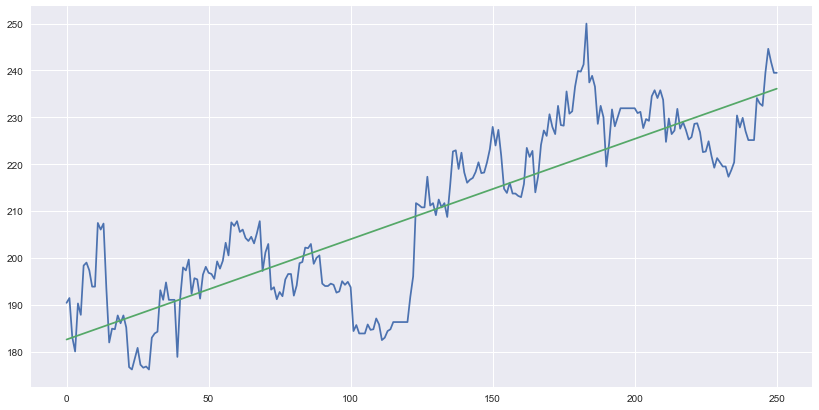

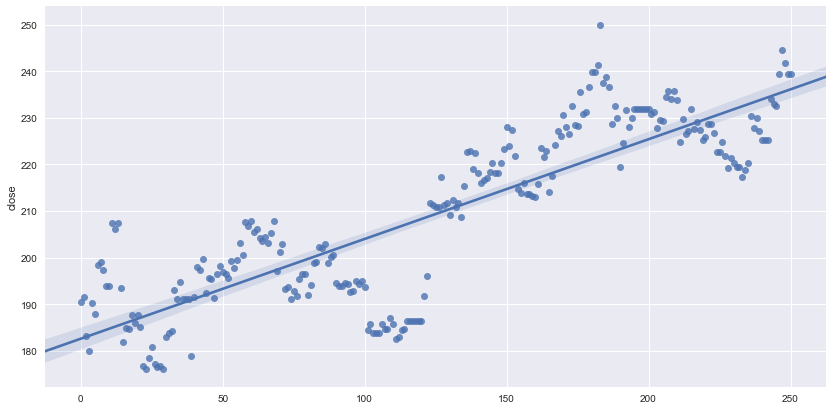

000400 选股周期内角度=12.265


<bound method NDFrame.tail of             close   high    low  p_change   open  pre_close    volume  \
2016-04-15  15.32  15.48  15.21    -0.065  15.35      15.33  10225045   
2016-04-18  14.86  15.19  14.75    -3.003  15.19      15.32  11335729   
2016-04-19  14.94  15.07  14.80     0.538  15.00      14.86   8848102   
2016-04-20  14.29  15.09  13.88    -4.351  15.05      14.94  16854133   
2016-04-21  14.05  14.46  14.03    -1.679  14.20      14.29  11311067   
2016-04-22  14.85  14.94  13.87     5.694  13.98      14.05  16696283   
2016-04-25  14.66  14.83  14.35    -1.279  14.70      14.85  10029061   
2016-04-26  15.48  15.48  14.54     5.593  14.63      14.66  27258572   
2016-04-27  15.53  15.87  15.30     0.323  15.40      15.48  34096874   
2016-04-28  15.40  15.58  14.81    -0.837  15.48      15.53  17677406   
...           ...    ...    ...       ...    ...        ...       ...   
2018-03-29  11.32  11.36  11.20    -0.702  11.30      11.40  10435419   
2018-03-30  11.33  11

In [5]:
from abupy import ABuRegUtil # 拟合工具模块

kl_pd_sfun = kl_pd_manger.get_pick_stock_kl_pd('000400')
print('000400 选股周期内角度={:.3f}'.format(ABuRegUtil.calc_regress_deg(kl_pd_sfun.close)))
ABuSymbolPd.make_kl_df('000400').tail